In [7]:
import pandas as pd  # 处理数据
import numpy as np  # 处理随机数据
import matplotlib.pyplot as plt  # 静态图表
import seaborn as sns  # 统计数据可视化
from scipy import stats  # 统计分析
import plotly.express as px  # 交互式可视化

# 1️⃣ 读取 CSV 文件
file_path = "/Users/mac/Downloads/ecommerce_sales_analysis.csv"  # 确保路径正确
df = pd.read_csv(file_path)

# 2️⃣ 查看数据前 5 行
print(df.head())



   product_id product_name        category   price  review_score  \
0           1    Product_1        Clothing  190.40           1.7   
1           2    Product_2  Home & Kitchen  475.60           3.2   
2           3    Product_3            Toys  367.34           4.5   
3           4    Product_4            Toys  301.34           3.9   
4           5    Product_5           Books   82.23           4.2   

   review_count  sales_month_1  sales_month_2  sales_month_3  sales_month_4  \
0           220            479            449             92            784   
1           903             21            989            861            863   
2           163            348            558            567            143   
3           951            725            678             59             15   
4           220            682            451            649            301   

   sales_month_5  sales_month_6  sales_month_7  sales_month_8  sales_month_9  \
0            604            904     

In [8]:
# 1️⃣ 删除缺失值
df.dropna(inplace=True)

# 2️⃣ 确保数据格式正确
df = df.astype({
    "price": "float", 
    "review_score": "float", 
    "review_count": "int"
})

# 3️⃣ 创建 A/B 测试组（如果数据集中没有）
np.random.seed(42)  # 固定随机数种子，保证实验可复现
df["group_label"] = np.random.choice(["Buy One Get One", "Discount"], size=len(df))

# 4️⃣ 查看数据集是否更新
print(df.head())


   product_id product_name        category   price  review_score  \
0           1    Product_1        Clothing  190.40           1.7   
1           2    Product_2  Home & Kitchen  475.60           3.2   
2           3    Product_3            Toys  367.34           4.5   
3           4    Product_4            Toys  301.34           3.9   
4           5    Product_5           Books   82.23           4.2   

   review_count  sales_month_1  sales_month_2  sales_month_3  sales_month_4  \
0           220            479            449             92            784   
1           903             21            989            861            863   
2           163            348            558            567            143   
3           951            725            678             59             15   
4           220            682            451            649            301   

   sales_month_5  sales_month_6  sales_month_7  sales_month_8  sales_month_9  \
0            604            904     

In [9]:
# 1️⃣ 计算总收入
df["total_revenue"] = df["price"] * df["sales_month_1"]

# 2️⃣ 分组计算
group_a = df[df["group_label"] == "Buy One Get One"]["total_revenue"]
group_b = df[df["group_label"] == "Discount"]["total_revenue"]

# 3️⃣ 进行 T 检验（独立样本）
t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f"T-test statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# 📌 结论：
# - p < 0.05：表明两种促销策略的收入有显著差异
# - p >= 0.05：表明促销策略对收入影响不显著


T-test statistic: -0.6746, P-value: 0.5001


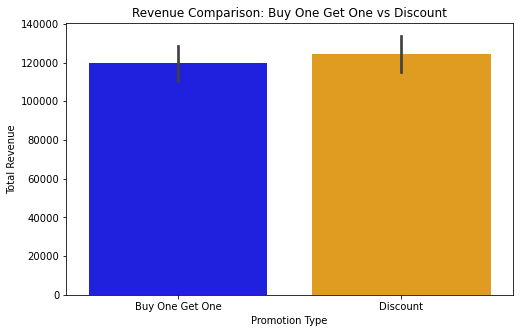

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x="group_label", y="total_revenue", data=df, palette=["blue", "orange"])
plt.title("Revenue Comparison: Buy One Get One vs Discount")
plt.xlabel("Promotion Type")
plt.ylabel("Total Revenue")
plt.show()


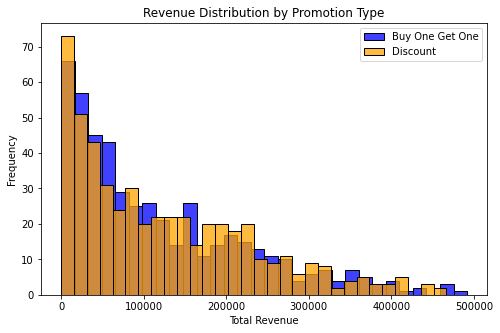

In [13]:
plt.figure(figsize=(8, 5))

sns.histplot(df[df["group_label"] == "Buy One Get One"]["total_revenue"], 
             color="blue", label="Buy One Get One", bins=30)

sns.histplot(df[df["group_label"] == "Discount"]["total_revenue"], 
             color="orange", label="Discount", bins=30)

plt.title("Revenue Distribution by Promotion Type")
plt.xlabel("Total Revenue")
plt.ylabel("Frequency")
plt.legend()
plt.show()



In [18]:
import pandas as pd
import numpy as np

# Load dataset (assuming it's already loaded as df)

# Compute total sales and revenue across all months
df["total_sales"] = df[[col for col in df.columns if "sales_month" in col]].sum(axis=1)
df["total_revenue"] = df["price"] * df["total_sales"]

# Estimate visitors per product (assumed conversion ratio of 5%)
df["estimated_visitors"] = df["total_sales"] / 0.05  # Adjust ratio if needed

# Compute key metrics
df["conversion_rate"] = df["total_sales"] / df["estimated_visitors"]
df["average_order_value"] = df["total_revenue"] / df["total_sales"]

# Approximate repeat purchase rate using multi-month sales (if high sales continue, users are likely repurchasing)
df["repeat_purchase_rate"] = df["sales_month_2"] / df["sales_month_1"]

# Grouped analysis by A/B test group
metrics = df.groupby("group_label").agg(
    conversion_rate=("conversion_rate", "mean"),
    average_order_value=("average_order_value", "mean"),
    repeat_purchase_rate=("repeat_purchase_rate", "mean")
).reset_index()

print(metrics)


       group_label  conversion_rate  average_order_value  repeat_purchase_rate
0  Buy One Get One             0.05           242.567878                   NaN
1         Discount             0.05           252.586020                   NaN
